In [1]:
%matplotlib inline
import GEOparse
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklego.linear_model import LowessRegression
from sklearn.feature_selection import f_classif
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import explained_variance_score, plot_roc_curve
import statsmodels.api as sm
from scipy.stats import ttest_ind
from xgboost import XGBClassifier
from sklearn.metrics import RocCurveDisplay, roc_auc_score
import random

In [2]:
from Scripts.Utils.datasets import get_datasets_intersections, get_dataset

In [3]:
data1, data2, data3, data4 = get_datasets_intersections(["Asakura2020", "Fehlmann2020", "Patnaik2017", "Leidinger2011"], False)
data = pd.concat([data1, data2])
data.head()

,AUCACACAAAGGCAACUUUUGU,AAGGAGCUCACAGUCUAUUGAG,AAUCCUUGGAACCUAGGUGUGAGU,AACACACCUGGUUAACCUCUUU,CAACACCAGUCGAUGGGCUGU,AUCGGGAAUGUCGUGUCCGCCC,AAGGCAGGGCCCCCGCUCCCC,UCCCUGAGACCCUUUAACCUGUGA,AACACACCUAUUCAAGGAUUCA,UAAAGUGCUGACAGUGCAGAU,...,UACAGUACUGUGAUAACUGAA,CAGUGCAAUGAUGAAAGGGCAU,GUGAGUCUCUAAGAAAAGAGGA,AAUCCUUUGUCCCUGGGUGAGA,UUACAGUUGUUCAACCAGUUACU,AGACUUCCCAUUUGAAGGUGGC,GCUGGUUUCAUAUGGUGGUUUAGA,CUAGACUGAAGCUCCUUGAGG,AGGCGGGGCGCCGCGGGACCGC,cancer
0,1.107048,-0.552272,0.999683,1.226687,-0.759325,1.126660,-0.817638,0.098680,0.029617,0.639944,...,-0.084776,1.424403,0.272698,-0.068347,-0.104073,1.341123,-0.342064,0.058633,0.775661,0
1,0.828589,1.138434,1.246583,-0.648622,1.346267,-0.274372,-1.388804,1.057887,-0.241475,0.939936,...,-0.347719,0.671438,-0.081818,-0.451568,-0.429919,-0.025074,1.339764,-1.282456,1.985896,0
2,0.371012,-0.107617,0.051275,1.285241,0.360637,-0.054654,-0.517155,1.452164,0.901461,0.338412,...,0.924588,0.925952,-0.774782,1.303690,0.613911,0.624689,-0.126499,0.817949,-0.410467,0
3,1.174268,0.635121,1.332251,-0.157249,-0.529686,0.317775,-0.025166,0.699018,0.145482,1.747883,...,2.182994,1.752087,0.445402,0.138256,0.061769,0.548554,-0.339872,1.307806,2.871152,0
4,-0.016932,1.239511,0.289278,1.302150,1.544678,-1.244442,-0.612944,1.454053,0.356729,1.674678,...,0.228197,1.811480,2.996254,0.333754,1.465763,0.608614,-0.090168,-0.469281,1.777267,0


In [4]:
data2

,AUCACACAAAGGCAACUUUUGU,AAGGAGCUCACAGUCUAUUGAG,AAUCCUUGGAACCUAGGUGUGAGU,AACACACCUGGUUAACCUCUUU,CAACACCAGUCGAUGGGCUGU,AUCGGGAAUGUCGUGUCCGCCC,AAGGCAGGGCCCCCGCUCCCC,UCCCUGAGACCCUUUAACCUGUGA,AACACACCUAUUCAAGGAUUCA,UAAAGUGCUGACAGUGCAGAU,...,UACAGUACUGUGAUAACUGAA,CAGUGCAAUGAUGAAAGGGCAU,GUGAGUCUCUAAGAAAAGAGGA,AAUCCUUUGUCCCUGGGUGAGA,UUACAGUUGUUCAACCAGUUACU,AGACUUCCCAUUUGAAGGUGGC,GCUGGUUUCAUAUGGUGGUUUAGA,CUAGACUGAAGCUCCUUGAGG,AGGCGGGGCGCCGCGGGACCGC,cancer
0,-1.057205,-1.135656,-1.767184,-1.314774,-1.519338,-1.426577,-1.919159,-1.799211,-1.165268,-1.337889,...,-0.990853,-1.537374,-1.626991,-1.811957,-0.844041,-1.109216,-1.170721,-1.574359,-1.127744,False
1,-0.819515,1.015222,1.336788,-0.834747,0.720699,0.459394,0.343986,0.439191,1.258973,0.921154,...,0.341736,0.883248,1.503058,1.015240,-0.640268,-0.464325,-0.417443,1.235416,-0.323426,False
2,0.257930,1.239977,0.982313,1.045489,-0.763835,-0.069791,0.166843,1.338724,1.205546,0.413700,...,0.675133,0.745294,0.955035,0.463462,0.018510,-0.472670,-0.429723,0.777870,-0.599093,False
3,-0.028551,0.676885,0.246458,-0.256321,0.230191,-0.505821,-0.334059,0.312435,0.641768,1.206191,...,1.800823,0.903132,0.792435,0.267252,1.611804,-0.511183,0.190823,-0.029413,-0.572263,False
4,0.215294,0.855045,1.052655,-0.065880,1.263396,0.560067,0.372889,0.951790,1.038015,1.062694,...,1.105055,0.968487,1.125843,0.570969,0.278434,0.958042,0.712106,0.953349,0.267245,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1565,-0.548363,-0.634854,-0.922321,-0.892611,-0.415781,-0.586660,-0.960929,-0.991333,-0.710350,0.096777,...,0.672461,-0.500744,-0.702505,-1.059987,-0.081859,-0.789379,-0.573239,-1.022547,-1.068751,True
1566,-0.622018,-1.446724,-0.599514,-0.925962,-0.334455,-0.196022,0.535860,0.036383,-1.119544,-1.501519,...,-1.753576,-1.119402,-1.331641,0.468886,-0.711710,-0.491521,-0.587875,-0.713315,-0.026407,True
1567,-0.742774,0.698317,1.046274,-0.539542,-0.975786,-0.331669,0.516360,0.312427,0.604519,0.255129,...,0.597744,1.013808,0.973267,0.664009,-0.666026,-0.563277,-0.301429,1.413965,-0.565762,True
1568,0.728209,0.510450,0.696581,0.342014,2.537964,-0.169254,0.265317,0.552967,1.344259,0.839008,...,0.462573,0.317927,0.678382,-0.107978,-0.425711,-0.092157,-0.279612,0.802340,0.920201,True


In [5]:
data1.head()

,AUCACACAAAGGCAACUUUUGU,AAGGAGCUCACAGUCUAUUGAG,AAUCCUUGGAACCUAGGUGUGAGU,AACACACCUGGUUAACCUCUUU,CAACACCAGUCGAUGGGCUGU,AUCGGGAAUGUCGUGUCCGCCC,AAGGCAGGGCCCCCGCUCCCC,UCCCUGAGACCCUUUAACCUGUGA,AACACACCUAUUCAAGGAUUCA,UAAAGUGCUGACAGUGCAGAU,...,UACAGUACUGUGAUAACUGAA,CAGUGCAAUGAUGAAAGGGCAU,GUGAGUCUCUAAGAAAAGAGGA,AAUCCUUUGUCCCUGGGUGAGA,UUACAGUUGUUCAACCAGUUACU,AGACUUCCCAUUUGAAGGUGGC,GCUGGUUUCAUAUGGUGGUUUAGA,CUAGACUGAAGCUCCUUGAGG,AGGCGGGGCGCCGCGGGACCGC,cancer
0,1.107048,-0.552272,0.999683,1.226687,-0.759325,1.126660,-0.817638,0.098680,0.029617,0.639944,...,-0.084776,1.424403,0.272698,-0.068347,-0.104073,1.341123,-0.342064,0.058633,0.775661,0
1,0.828589,1.138434,1.246583,-0.648622,1.346267,-0.274372,-1.388804,1.057887,-0.241475,0.939936,...,-0.347719,0.671438,-0.081818,-0.451568,-0.429919,-0.025074,1.339764,-1.282456,1.985896,0
2,0.371012,-0.107617,0.051275,1.285241,0.360637,-0.054654,-0.517155,1.452164,0.901461,0.338412,...,0.924588,0.925952,-0.774782,1.303690,0.613911,0.624689,-0.126499,0.817949,-0.410467,0
3,1.174268,0.635121,1.332251,-0.157249,-0.529686,0.317775,-0.025166,0.699018,0.145482,1.747883,...,2.182994,1.752087,0.445402,0.138256,0.061769,0.548554,-0.339872,1.307806,2.871152,0
4,-0.016932,1.239511,0.289278,1.302150,1.544678,-1.244442,-0.612944,1.454053,0.356729,1.674678,...,0.228197,1.811480,2.996254,0.333754,1.465763,0.608614,-0.090168,-0.469281,1.777267,0


In [6]:
def plot_pca(data1, data2, base=None):
    pca = PCA(n_components=2)
    if base is None:
        base = pd.concat([data1, data2])
    pca = pca.fit(base.iloc[:, :-1])
    components1 = pca.transform(data1.iloc[:, :-1])
    components2 = pca.transform(data2.iloc[:, :-1])
    
    fig = plt.figure(figsize = (8,8))
    ax = fig.add_subplot(1,1,1)
    
    ax.set_xlabel('Principal Component 1', fontsize = 15)
    ax.set_ylabel('Principal Component 2', fontsize = 15)
    ax.set_title('2 component PCA', fontsize = 20)
    targets = ['Asakura controls', 'Asakura case', 'Fehlmann controls', 'Fehlmann case']
    colors = ['r', 'g', 'b', 'y']
    ax.scatter(components1[data1["cancer"] == 0, 0], components1[data1["cancer"] == 0, 1], c = 'g', s = 10)
    ax.scatter(components1[data1["cancer"] == 1, 0], components1[data1["cancer"] == 1, 1], c = 'r', s = 10)
    ax.scatter(components2[data2["cancer"] == 0, 0], components2[data2["cancer"] == 0, 1], c = 'b', s = 10)
    ax.scatter(components2[data2["cancer"] == 1, 0], components2[data2["cancer"] == 1, 1], c = 'y', s = 10)
    ax.legend(targets)
    ax.grid()
    plt.show()

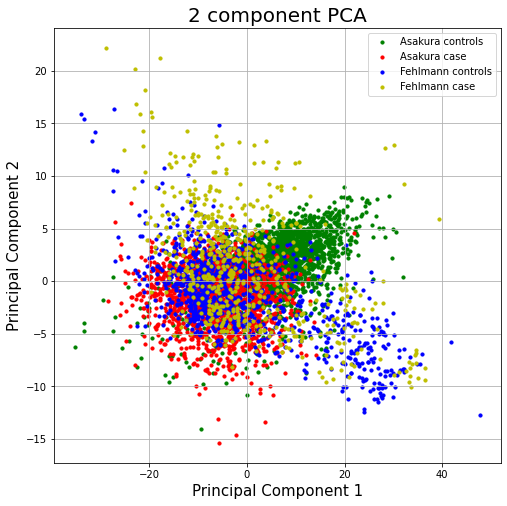

In [7]:
plot_pca(data1, data2)

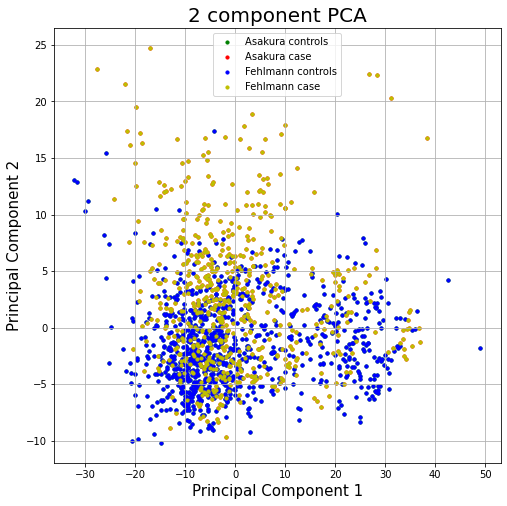

In [271]:
plot_pca(data2, data2, data2)

### Logistic regression

In [272]:
#data1, data2 = get_datasets_intersections(["Asakura2020_adjusted", "Fehlmann2020_cleaned"])

In [274]:
model = LogisticRegression()
model.fit(pd.concat([data1.iloc[:, :-1], data2.iloc[:, :-1]]), pd.concat([data1["cancer"], data2["cancer"]]))

LogisticRegression()

C:\Users\Ole Fredrik\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


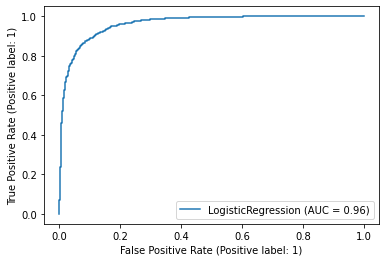

In [278]:
plot_roc_curve(model, data1.iloc[:, :-1], data1["cancer"])

C:\Users\Ole Fredrik\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


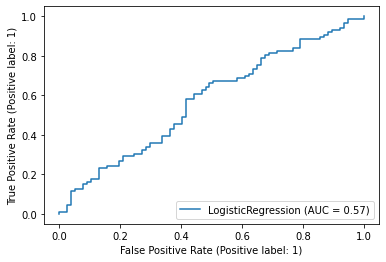

In [276]:
plot_roc_curve(model, data3.iloc[:, :-1], data3["cancer"])

C:\Users\Ole Fredrik\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


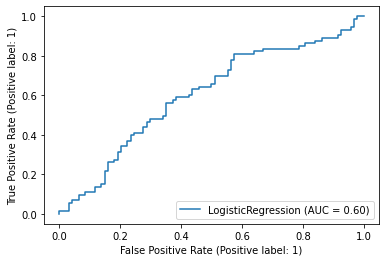

In [277]:
plot_roc_curve(model, data4.iloc[:, :-1], data4["cancer"])

In [318]:
model1, model2, model3 = [LogisticRegression(max_iter=1000) for i in range(3)]
model1.fit(data1.iloc[:, :-1], data1["cancer"])
model2.fit(data2.iloc[:, :-1], data2["cancer"])
model3.fit(data4.iloc[:, :-1], data4["cancer"])

LogisticRegression(max_iter=1000)

In [319]:
predictions = model1.predict_proba(data3.iloc[:, :-1])[:, 1] + model2.predict_proba(data3.iloc[:, :-1])[:, 1] + model3.predict_proba(data3.iloc[:, :-1])[:, 1]

In [315]:
from sklearn.metrics import RocCurveDisplay

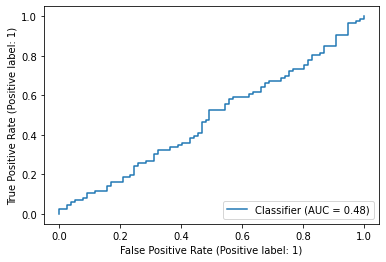

In [320]:
RocCurveDisplay.from_predictions(data3["cancer"], predictions)

array([0, 3, 1, ..., 1, 2, 1], dtype=int64)

In [296]:
model = LogisticRegression(max_iter=1000)
model.fit(pd.concat([data1.iloc[:, :-1], data4.iloc[:, :-1], data3.iloc[:, :-1]]), pd.concat([data1["cancer"], data4["cancer"], data3["cancer"]]))

LogisticRegression(max_iter=1000)

C:\Users\Ole Fredrik\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


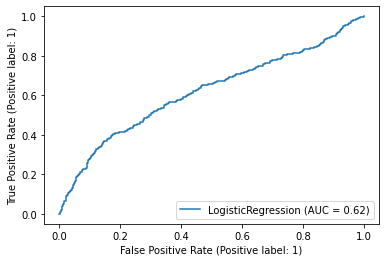

In [297]:
plot_roc_curve(model, data2.iloc[:, :-1], data2["cancer"])

C:\Users\Ole Fredrik\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


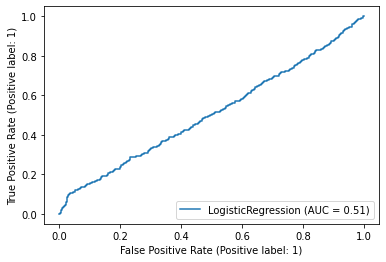

In [288]:
plot_roc_curve(model, data2.iloc[:, :-1], data2["cancer"])

C:\Users\Ole Fredrik\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


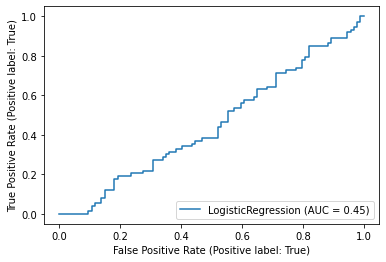

In [92]:
plot_roc_curve(model, data4.iloc[:, :-1], data4["cancer"])

In [93]:
model = LogisticRegression(class_weight="balanced")
model.fit(data3.iloc[:, :-1], data3["cancer"])

LogisticRegression(class_weight='balanced')

C:\Users\Ole Fredrik\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


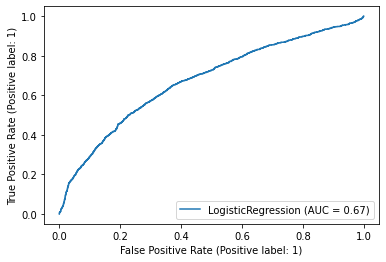

In [94]:
plot_roc_curve(model, data1.iloc[:, :-1], data1["cancer"])

C:\Users\Ole Fredrik\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


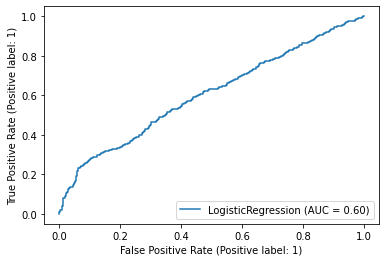

In [95]:
plot_roc_curve(model, data2.iloc[:, :-1], data2["cancer"])

C:\Users\Ole Fredrik\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


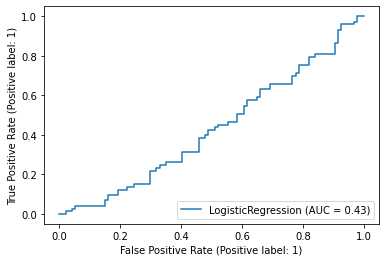

In [96]:
plot_roc_curve(model, data4.iloc[:, :-1], data4["cancer"])

In [7]:
data1, data4 = get_datasets_intersections(["Patnaik2017", "Asakura2020"], True)

In [10]:
model = LogisticRegression(class_weight="balanced", max_iter=2000)
model.fit(data4.iloc[:, :-1], data4["cancer"])

LogisticRegression(class_weight='balanced', max_iter=2000)

C:\Users\Ole Fredrik\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


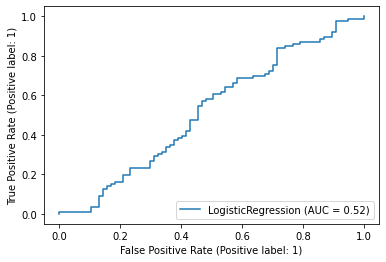

In [11]:
plot_roc_curve(model, data1.iloc[:, :-1], data1["cancer"])

C:\Users\Ole Fredrik\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


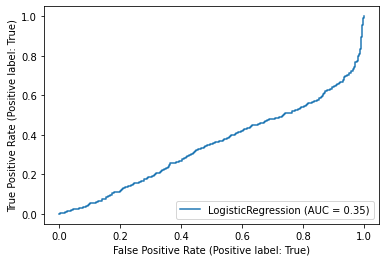

In [100]:
plot_roc_curve(model, data2.iloc[:, :-1], data2["cancer"])

C:\Users\Ole Fredrik\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


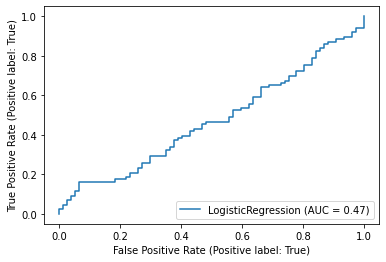

In [101]:
plot_roc_curve(model, data3.iloc[:, :-1], data3["cancer"])

In [118]:
RocCurveDisplay.from_predictions(data2["cancer"], -data2["UGAGGUAGUAGGUUGUAUAGUU"])

NameError: name 'RocCurveDisplay' is not defined

In [28]:
data_a = get_dataset("Asakura2020")

In [43]:
vals = [roc_auc_score(data_a["cancer"], data_a[c]) for c in data_a.columns[:20]]

In [44]:
vals = [abs(v-0.5) + 0.5 for v in vals]

In [46]:
np.max(vals)

0.8964520241464946

In [179]:
data1, data2, data3, data4 = get_datasets_intersections(["Keller2014", "Bianchi2011", "Bianchi2011_cleaned", "Bianchi2011_adjusted"], True)

In [180]:
logreg = LogisticRegression(max_iter=1000)
logreg.fit(data1.iloc[:, :-1], data1["cancer"])

LogisticRegression(max_iter=1000)

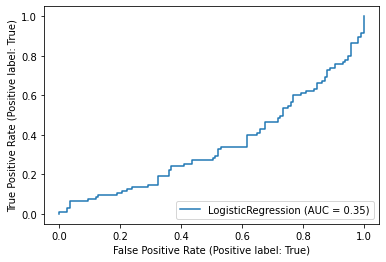

In [181]:
RocCurveDisplay.from_estimator(logreg, data2.iloc[:,:-1], data2["cancer"])

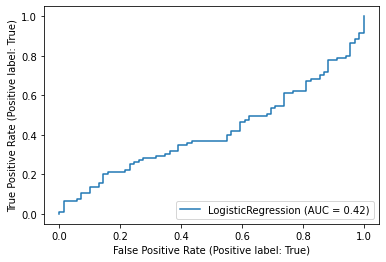

In [182]:
RocCurveDisplay.from_estimator(logreg, data3.iloc[:,:-1], data3["cancer"])

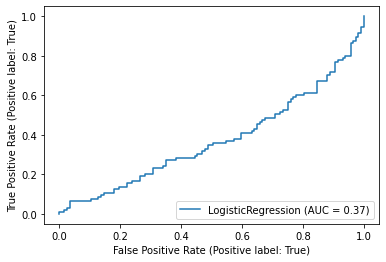

In [183]:
RocCurveDisplay.from_estimator(logreg, data4.iloc[:,:-1], data4["cancer"])

In [170]:
data3

,UCAGUGCAUCACAGAACUUUGU,UCGUACCGUGAGUAAUAAUGCG,AGCAGCAUUGUACAGGGCUAUGA,CAUAAAGUAGAAAGCACUACU,UGUAAACAUCCUACACUCAGCU,UAGCACCAUCUGAAAUCGGUUA,CAACGGAAUCCCAAAAGCAGCUG,UCAGUGCACUACAGAACUUUGU,CAAAGUGCUUACAGUGCAGGUAG,AAGCUGCCAGUUGAAGAACUGU,...,GCCCCUGGGCCUAUCCUAGAA,AUCAUAGAGGAAAAUCCACGU,CUGGCCCUCUCUGCCCUUCCGU,AAGGAGCUCACAGUCUAUUGAG,UCUACAGUGCACGUGUCUCCAGU,UGUAAACAUCCUACACUCUCAGC,UUCAAGUAAUUCAGGAUAGGU,UUAUAAUACAACCUGAUAAGUG,UCUUGGAGUAGGUCAUUGGGUGG,cancer
0,-1.616441,0.484641,-0.045867,-1.239751,0.178995,-1.198819,0.472292,-0.173071,0.759750,0.116655,...,0.460096,0.110229,-0.601585,-0.045186,1.013648,0.697663,0.929684,0.155732,-0.720290,False
1,-2.147324,0.842050,0.323174,-1.020246,0.648568,-0.365665,0.894065,-1.245626,1.368321,0.177647,...,1.314864,-1.621114,-0.847416,0.841994,1.860136,0.887928,0.666707,0.383195,-0.827435,False
2,-0.651243,0.235224,-1.631161,-0.938916,0.604523,0.410121,-0.119894,-0.296224,-0.290356,0.734802,...,0.700896,0.761762,-0.248044,-0.758279,0.436430,0.804398,0.316664,0.223467,-0.833289,False
3,-0.274209,-0.145124,-0.621421,-0.214090,-1.733373,0.806299,-0.146610,-0.124800,-1.588186,-0.090183,...,-0.149151,-1.319976,-0.588900,-1.124918,-2.096296,-0.996063,-0.331673,-0.351997,-1.155264,False
4,1.480278,1.999975,0.638999,0.506709,0.833313,-0.191794,-0.464663,0.017455,0.667482,0.152680,...,-1.181065,2.075609,-0.176173,0.259281,-0.071443,-0.412316,0.272748,2.073924,-0.952564,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159,0.207357,0.067388,0.369777,0.631265,0.117159,0.261129,-0.965409,1.121679,-0.779329,0.419680,...,0.076133,1.592106,-0.248900,-0.189448,0.165148,-0.633842,-0.801550,0.286717,0.373018,True
160,-0.775193,0.212524,0.431290,0.151984,-0.522116,-0.953899,-0.660591,-0.642170,0.647033,-0.932933,...,0.680117,-1.544012,0.253703,-0.063476,0.984297,0.244756,0.113805,0.400760,1.134801,True
161,-0.500098,-1.500931,-1.993714,-0.408356,-1.352353,-0.892787,-1.280652,-1.060198,-0.187039,-1.062499,...,-0.085983,-1.421922,0.544486,-0.211104,0.686923,-0.743644,-1.210531,-0.693008,0.763772,True
162,-0.788709,-1.225001,-0.641016,0.306596,-2.782296,-0.281401,-1.307027,-0.741593,-3.883438,0.268048,...,-0.892973,-1.469137,-0.326626,-0.814746,0.411727,-2.047735,-0.169325,0.256367,-0.754478,True


In [190]:
logreg = LogisticRegression(max_iter=1000)
logreg.fit(data3.iloc[:, :-1], data3["cancer"])

LogisticRegression(max_iter=1000)

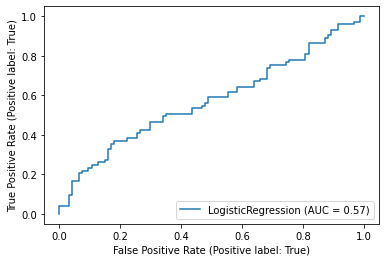

In [191]:
RocCurveDisplay.from_estimator(logreg, data1.iloc[:,:-1], data1["cancer"])

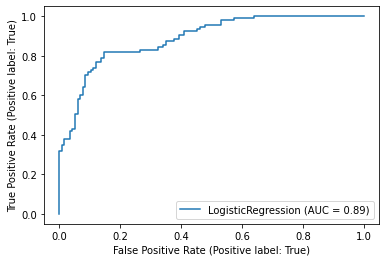

In [146]:
RocCurveDisplay.from_estimator(logreg, data4.iloc[:,:-1], data4["cancer"])

In [239]:
data1, data2, data3 = get_datasets_intersections(["Li2017", "Boeri2011", "Boeri2011_adjusted"], True)

In [240]:
logreg = LogisticRegression(max_iter=1000)
logreg.fit(data1.iloc[:, :-1], data1["cancer"])

LogisticRegression(max_iter=1000)

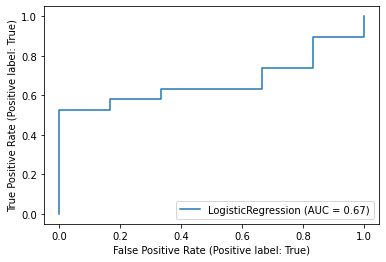

In [241]:
RocCurveDisplay.from_estimator(logreg, data3.iloc[:,:-1], data3["cancer"])

In [242]:
logreg = LogisticRegression(max_iter=1000)
logreg.fit(data2.iloc[:, :-1], data2["cancer"])

LogisticRegression(max_iter=1000)

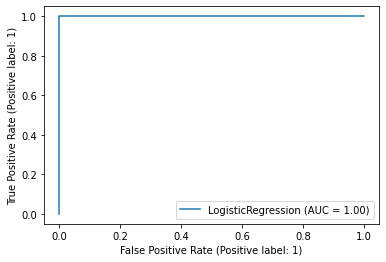

In [243]:
RocCurveDisplay.from_estimator(logreg, data1.iloc[:,:-1], data1["cancer"])

In [465]:
data1, data2 = get_datasets_intersections(["Jin2017", "Bianchi2011"], True)

In [466]:
data2.head()

,UGUAAACAUCCUACACUCAGCU,UCGUACCGUGAGUAAUAAUGCG,CAAAGUGCUUACAGUGCAGGUAG,UCUACAGUGCACGUGUCUCCAGU,CUGGCCCUCUCUGCCCUUCCGU,CAACGGAAUCCCAAAAGCAGCUG,UCUUGGAGUAGGUCAUUGGGUGG,AAGCUGCCAGUUGAAGAACUGU,UGUAAACAUCCUACACUCUCAGC,UCUCACACAGAAAUCGCACCCGU,UUCAAGUAAUUCAGGAUAGGU,UUCAAGUAAUCCAGGAUAGGCU,UCAGUGCAUCACAGAACUUUGU,UCAGUGCACUACAGAACUUUGU,UAGCACCAUCUGAAAUCGGUUA,AAGGAGCUCACAGUCUAUUGAG,cancer
0,0.430518,-1.383285,-1.533459,-0.205114,-0.501386,1.129804,1.399884,0.377011,0.025040,0.884551,0.458861,0.664833,-1.061261,0.060151,1.341187,-1.185820,False
1,0.560098,1.550921,0.533638,0.419912,-0.210510,0.758327,1.056918,0.237413,0.163115,-0.423848,1.113358,1.460662,-0.135923,-0.578570,-0.919354,-0.079079,False
2,0.735258,-0.344387,0.288289,0.848335,0.277343,0.071051,-0.502049,0.606056,0.353918,-2.278963,0.095769,0.009345,-0.930327,-0.416299,0.025618,1.097172,False
3,0.551748,1.014969,0.643007,0.939530,0.442911,-0.009999,0.353091,0.416869,0.757269,0.442502,0.407714,0.893022,-1.388380,0.187241,-0.313501,0.639138,False
4,-1.022306,-1.755820,0.189494,-0.171618,-0.201605,-1.176813,-1.124890,-0.964450,0.245434,0.100470,-0.205114,-0.638624,-0.681318,-0.504356,-0.673526,0.584445,False


In [467]:
logreg = LogisticRegression(max_iter=1000)
logreg.fit(data1.iloc[:, :-1], data1["cancer"])

LogisticRegression(max_iter=1000)

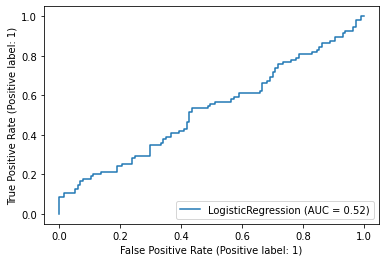

In [468]:
RocCurveDisplay.from_estimator(logreg, data2.iloc[:,:-1], data2["cancer"])

In [469]:
logreg = LogisticRegression(max_iter=1000)
logreg.fit(data2.iloc[:, :-1], data2["cancer"])

LogisticRegression(max_iter=1000)

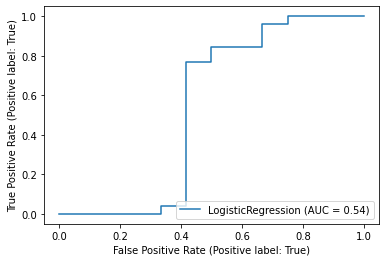

In [470]:
RocCurveDisplay.from_estimator(logreg, data1.iloc[:,:-1], data1["cancer"])

In [25]:
data = get_dataset("Fehlmann2020")

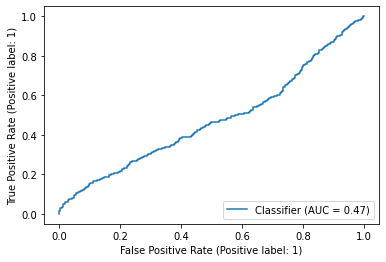

In [26]:
RocCurveDisplay.from_predictions(data["cancer"], data["ACUGCAGUGAAGGCACUUGUAG"])

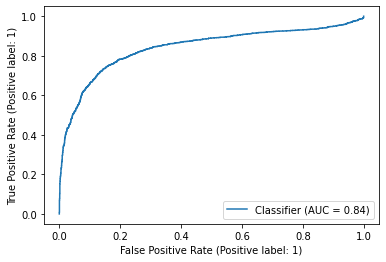

In [20]:
RocCurveDisplay.from_predictions(data["cancer"], data["ACGGCCCAGGCGGCAUUGGUG"])